# ***Data Cleaning and Visualisition: FIFA 21 Players Dataset***

## **Introduction**
The FIFA 21 dataset provides a rich repository of information on professional footballers, offering valuable insights for various analyses. However, to ensure the accuracy and reliability of our findings, it's essential to preprocess the data thoroughly. This involves addressing common data quality issues such as missing values, inconsistencies, and outliers.


## **Objective**
### *This project aims to:*

1.   Identify and handle missing values in the FIFA 21 dataset, employing appropriate imputation techniques to preserve data integrity.
2.   Correct inconsistencies and errors in the data, ensuring data accuracy and consistency.
3.   Transform data into a suitable format for analysis, including converting categorical variables to numerical representations and normalizing numerical data if necessary.
4.   Identify and address outliers that may skew the results, using statistical methods or visualization techniques to detect and handle anomalies.

## **Data Cleaning and Transformation Steps**

### 1. Import libraries

In [17]:
import pandas as pd
import numpy  as np

This code block imports two essential libraries for data manipulation:

*   **pandas (pd):** Provides high-performance, easy-to-use data structures and data analysis tools.
*   **numpy (np):** Offers efficient numerical computing functionalities and multi-dimensional array operations.

### 2. Import dataset

In [47]:
df = pd.read_csv("fifa21_raw_data.csv", low_memory=False)

### 3. Data Exploration

In [56]:
# View the first few rows of the data
df.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,High,Medium,5 ★,91,85,86,94,36,59,\n273


#### *Data types*

In [63]:
# Get an overview of the data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   photoUrl          18979 non-null  object
 1   LongName          18979 non-null  object
 2   playerUrl         18979 non-null  object
 3   Nationality       18979 non-null  object
 4   Positions         18979 non-null  object
 5   Name              18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Team & Contract   18979 non-null  object
 10  ID                18979 non-null  int64 
 11  Height            18979 non-null  object
 12  Weight            18979 non-null  object
 13  foot              18979 non-null  object
 14  BOV               18979 non-null  int64 
 15  BP                18979 non-null  object
 16  Growth            18979 non-null  int64 
 17  Joined      

**df.info()** displays a summary of the DataFrame, including information on:

*   Data types of each column
*   Number of non-null values in each column

This information helps understand the structure and potential issues within the data.

## **4. Data Cleaning and Transformation**

### Duplicates Data

In [70]:
# Check for duplicated rows in the Dataframe
df.duplicated().sum()

1

In [72]:
# Remove the duplicated row
df.drop_duplicates(inplace=True)

In [76]:
# Verify that duplicates have been removed
df.duplicated().sum()

0

### Missing Values

In [81]:
# Identify columns with missing values and their counts
df.isna().sum().sort_values(ascending=False)

Loan Date End       17965
photoUrl                0
GK Diving               0
Sliding Tackle          0
Standing Tackle         0
                    ...  
Heading Accuracy        0
Finishing               0
Crossing                0
Attacking               0
Hits                    0
Length: 77, dtype: int64

In [89]:
# Replace the missing values in the Loan Date End with "Not Present"
df["Loan Date End"].fillna("Not Present", inplace=True)
# Verify the changes
df["Loan Date End"]

0        Not Present
1        Not Present
2        Not Present
3        Not Present
4        Not Present
            ...     
18974    Not Present
18975    Not Present
18976    Not Present
18977    Not Present
18978    Not Present
Name: Loan Date End, Length: 18978, dtype: object

## **5. Converting and Renaming Columns**

In [98]:
# Convert columns names to lowercase for consistency
df.columns = df.columns.str.lower()
# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18978 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   photourl          18978 non-null  object
 1   longname          18978 non-null  object
 2   playerurl         18978 non-null  object
 3   nationality       18978 non-null  object
 4   positions         18978 non-null  object
 5   name              18978 non-null  object
 6   age               18978 non-null  int64 
 7   ↓ova              18978 non-null  int64 
 8   pot               18978 non-null  int64 
 9   team & contract   18978 non-null  object
 10  id                18978 non-null  int64 
 11  height            18978 non-null  object
 12  weight            18978 non-null  object
 13  foot              18978 non-null  object
 14  bov               18978 non-null  int64 
 15  bp                18978 non-null  object
 16  growth            18978 non-null  int64 
 17  joined           

In [107]:
# Renaming columns for better readabilty
column_renaming_dict = {
    "photourl": "photo_url",
    "longname": "long_name",
    "playerurl": "player_url",
    "↓ova": "ova",
    "loan date end": "loan_date_end",
    "release clause": "release_clause",
    "heading accuracy": "heading_accuracy",
    "short passing": "short_passing",
    "fk accuracy": "fk_accuracy",
    "long passing": "long_passing",
    "ball control": "ball_control",
    "sprint speed": "sprint_speed",
    "shot power": "shot_power",
    "long shots": "long_shots",
    "standing tackle": "standing_tackle",
    "sliding tackle": "sliding_tackle",
    "gk diving": "gk_diving",
    "gk handling": "gk_handling",
    "gk kicking": "gk_kicking",
    "gk positioning": "gk_positioning",
    "gk reflexes": "gk_reflexes",
    "total stats": "total_stats",
    "base stats": "base_stats"

}

df = df.rename(columns = column_renaming_dict)

In [109]:
# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18978 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   photo_url         18978 non-null  object
 1   long_name         18978 non-null  object
 2   player_url        18978 non-null  object
 3   nationality       18978 non-null  object
 4   positions         18978 non-null  object
 5   name              18978 non-null  object
 6   age               18978 non-null  int64 
 7   ova               18978 non-null  int64 
 8   pot               18978 non-null  int64 
 9   team & contract   18978 non-null  object
 10  id                18978 non-null  int64 
 11  height            18978 non-null  object
 12  weight            18978 non-null  object
 13  foot              18978 non-null  object
 14  bov               18978 non-null  int64 
 15  bp                18978 non-null  object
 16  growth            18978 non-null  int64 
 17  joined           

## **6. Reordering Columns**

In [336]:
# Define desired order
desired_order = ['id', 'name', 'long_name', 'age', 'nationality',
                 'team & contract', 'positions', 'height', 'weight',
                 'foot', 'joined', 'value', 'wage', 'release_clause', 'ova']

# Select remaining columns not in the desired order
remaining_columns = [col for col in df.columns if col not in desired_order]

# Reorder columns
df = df[desired_order + remaining_columns]

# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18978 entries, 0 to 18978
Data columns (total 83 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        18978 non-null  int64 
 1   name                      18978 non-null  object
 2   long_name                 18978 non-null  object
 3   age                       18978 non-null  int64 
 4   nationality               18978 non-null  object
 5   height_cm                 18978 non-null  int32 
 6   weight_kg                 18978 non-null  int64 
 7   team                      18741 non-null  object
 8   contract_start            18978 non-null  int32 
 9   contract_end              18978 non-null  int32 
 10  joined_year               18978 non-null  int32 
 11  joined_month              18978 non-null  int32 
 12  joined_day                18978 non-null  int32 
 13  value_eur                 18978 non-null  int32 
 14  wage_eur                  1

## **Team & Contract Column**

In [130]:
# Display the Team & Contract Column
df["team & contract"]

0                    \n\n\n\nFC Barcelona\n2004 ~ 2021\n\n
1                        \n\n\n\nJuventus\n2018 ~ 2022\n\n
2                 \n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n
3                 \n\n\n\nManchester City\n2015 ~ 2023\n\n
4             \n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n
                               ...                        
18974    \n\n\n\nChongqing Dangdai Lifan FC SWM Team\n2...
18975             \n\n\n\nOldham Athletic\n2020 ~ 2021\n\n
18976                  \n\n\n\nWuhan Zall\n2018 ~ 2022\n\n
18977             \n\n\n\nOldham Athletic\n2020 ~ 2021\n\n
18978                \n\n\n\nClub Bolívar\n2020 ~ 2024\n\n
Name: team & contract, Length: 18978, dtype: object

In [146]:
# Extract the "team" from the "team & contract" column
df["team"] = df["team & contract"].str.extract(r'(\n\n\n\n.*\n)', expand=False).str.strip()

# Extract the "contract" from the "team & contract" column
df["contract"] = df["team & contract"].str.findall(r'[\d~ ]+').str[-1]

# Extract the contract start and end years
df["contract_start"] = df["contract"].str.slice(0, 4)
df["contract_end"] = df["contract"].str.slice(-4)

# Convert contract_start and contract_end to integers
df["contract_start"] = pd.to_numeric(df["contract_start"], errors = "coerce").fillna(0).astype(int)
df["contract_end"] = pd.to_numeric(df["contract_end"], errors = "coerce").fillna(0).astype(int)

# Drop "team & contract" and "contract" columns
df.drop("team & contract", axis = 1, inplace=True)
df.drop("contract", axis = 1, inplace = True)

df.head()


,id,name,long_name,age,nationality,positions,height,weight,foot,joined,...,pac,sho,pas,dri,def,phy,hits,team,contract_start,contract_end
0,158023,L. Messi,Lionel Messi,33,Argentina,RW ST CF,"5'7""",159lbs,Left,"Jul 1, 2004",...,85,92,91,95,38,65,\n372,FC Barcelona,2004,2021
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,35,Portugal,ST LW,"6'2""",183lbs,Right,"Jul 10, 2018",...,89,93,81,89,35,77,\n344,Juventus,2018,2022
2,200389,J. Oblak,Jan Oblak,27,Slovenia,GK,"6'2""",192lbs,Right,"Jul 16, 2014",...,87,92,78,90,52,90,\n86,Atlético Madrid,2014,2023
3,192985,K. De Bruyne,Kevin De Bruyne,29,Belgium,CAM CM,"5'11""",154lbs,Right,"Aug 30, 2015",...,76,86,93,88,64,78,\n163,Manchester City,2015,2023
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,28,Brazil,LW CAM,"5'9""",150lbs,Right,"Aug 3, 2017",...,91,85,86,94,36,59,\n273,Paris Saint-Germain,2017,2022


###  Height Column

In [151]:
# Display the "height" column
df["height"]

0         5'7"
1         6'2"
2         6'2"
3        5'11"
4         5'9"
         ...  
18974    5'10"
18975     5'7"
18976    5'10"
18977     5'9"
18978     5'9"
Name: height, Length: 18978, dtype: object

In [162]:
# Define a function to convert feet and inches to centimeters
def height_to_cm(height_str):
    feet, inches = height_str.split("'")
    feet = int(feet)
    inches = int(inches.replace('"',""))
    total_feet = feet + (inches * 0.08)
    return total_feet * 30.48

# Apply the conversion function
df["height_cm"] = df["height"].apply(height_to_cm).astype(int)

# Display "height_cm"
df["height_cm"]

0        169
1        187
2        187
3        179
4        174
        ... 
18974    176
18975    169
18976    176
18977    174
18978    174
Name: height_cm, Length: 18978, dtype: int32

### Weight Column

In [160]:
# Display "weight" column
df["weight"]

0        159lbs
1        183lbs
2        192lbs
3        154lbs
4        150lbs
          ...  
18974    154lbs
18975    128lbs
18976    146lbs
18977    143lbs
18978    150lbs
Name: weight, Length: 18978, dtype: object

In [174]:
# Remove "lbs" from the original "weight" column and convert to kilograms
def lbs_to_kg(weight_str):
    lbs_weight = weight_str.replace("lbs", "").strip()
    kg_weight = float(lbs_weight) * 0.453592
    return int(kg_weight)

# Apply the conversion function
df["weight_kg"] =  df["weight"].apply(lbs_to_kg)

# Remove "lbs" from the "weight" column and convert to integer
df["weight"] = df["weight"].str.replace("lbs", "", regex = False).astype(int)

# Rename the column "weight" to "weight_lbs"
df = df.rename(columns = {"weight": "weight_lbs"})

# View changes
df["weight_kg"]


0        72
1        83
2        87
3        69
4        68
         ..
18974    69
18975    58
18976    66
18977    64
18978    68
Name: weight_kg, Length: 18978, dtype: int64

### Joined Column

In [189]:
# Display the first 5 values of the "joined" column
df["joined"].head()

0     Jul 1, 2004
1    Jul 10, 2018
2    Jul 16, 2014
3    Aug 30, 2015
4     Aug 3, 2017
Name: joined, dtype: object

In [193]:
# Convert the "joined" column to datetime format
df["joined"] = pd.to_datetime(df["joined"])

# Extract year, month, and day from the "joined" column
df["joined_year"] = df["joined"].dt.year
df["joined_month"] = df["joined"].dt.month
df["joined_day"] = df["joined"].dt.day

# Drop the original "joined" column
df.drop("joined", axis=1, inplace=True)

# Display the first 5 rows of the DataFrame after modifications
df.head()

,id,name,long_name,age,nationality,positions,height,weight_lbs,foot,value,...,phy,hits,team,contract_start,contract_end,height_cm,weight_kg,joined_year,joined_month,joined_day
0,158023,L. Messi,Lionel Messi,33,Argentina,RW ST CF,"5'7""",159,Left,€67.5M,...,65,\n372,FC Barcelona,2004,2021,169,72,2004,7,1
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,35,Portugal,ST LW,"6'2""",183,Right,€46M,...,77,\n344,Juventus,2018,2022,187,83,2018,7,10
2,200389,J. Oblak,Jan Oblak,27,Slovenia,GK,"6'2""",192,Right,€75M,...,90,\n86,Atlético Madrid,2014,2023,187,87,2014,7,16
3,192985,K. De Bruyne,Kevin De Bruyne,29,Belgium,CAM CM,"5'11""",154,Right,€87M,...,78,\n163,Manchester City,2015,2023,179,69,2015,8,30
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,28,Brazil,LW CAM,"5'9""",150,Right,€90M,...,59,\n273,Paris Saint-Germain,2017,2022,174,68,2017,8,3


### Value, Wage and Release_Clause Columns

In [196]:
# Display the specified columns
df[["value", "wage", "release_clause"]]

,value,wage,release_clause
0,€67.5M,€560K,€138.4M
1,€46M,€220K,€75.9M
2,€75M,€125K,€159.4M
3,€87M,€370K,€161M
4,€90M,€270K,€166.5M
...,...,...,...
18974,€35K,€1K,€57K
18975,€60K,€500,€165K
18976,€40K,€1K,€70K
18977,€60K,€500,€165K


In [ ]:
# Function to Convert Currency Strings
def convert_currency(value_str):
    # Remove the currency symbole
    value_str = value_str.replace("€","").strip()
    if "M" in value_str:
        return float(value_str.replace("M","").strip()) * 1_000_000
    if "K" in value_str:
        return float(value_str.replace("K","").strip()) * 1_000
    else:
        return float(value_str)

# Apply the conversion function
df["value"] = df["value"].apply(convert_currency)
df["wage"] = df["wage"].apply(convert_currency)
df["release_clause"] = df["release_clause"].apply(convert_currency)

# Display the specified columns
df[["value", "wage", "release_clause"]]

In [202]:
# Display the specified columns
df[["value", "wage", "release_clause"]]

,value,wage,release_clause
0,67500000.0,560000.0,138400000.0
1,46000000.0,220000.0,75900000.0
2,75000000.0,125000.0,159400000.0
3,87000000.0,370000.0,161000000.0
4,90000000.0,270000.0,166500000.0
...,...,...,...
18974,35000.0,1000.0,57000.0
18975,60000.0,500.0,165000.0
18976,40000.0,1000.0,70000.0
18977,60000.0,500.0,165000.0


In [208]:
df["value"] = df["value"].astype(int)
df["wage"] = df["wage"].astype(int)
df["release_clause"] = df["release_clause"].astype(int)

In [313]:
# Renaming columns for better readability
df = df.rename(columns={"value" : "value_eur","wage" : "wage_eur", "release_clause" : "release_clause_eur"})

In [317]:
df[["value_eur","wage_eur", "release_clause_eur"]].head()

,value_eur,wage_eur,release_clause_eur
0,67500000,560000,138400000
1,46000000,220000,75900000
2,75000000,125000,159400000
3,87000000,370000,161000000
4,90000000,270000,166500000


### W/F, SM and IR Columns

In [215]:
df[["w/f","sm", "ir"]].head()

,w/f,sm,ir
0,4 ★,4★,5 ★
1,4 ★,5★,5 ★
2,3 ★,1★,3 ★
3,5 ★,4★,4 ★
4,5 ★,5★,5 ★


In [217]:
# Renaming columns for better readability
df = df.rename(columns={"w/f" : "weak_foot","sm" : "skill_moves", "ir" : "international_reputation"})

In [223]:
# Display the results
df[["weak_foot","skill_moves", "international_reputation"]].head()

,weak_foot,skill_moves,international_reputation
0,4 ★,4★,5 ★
1,4 ★,5★,5 ★
2,3 ★,1★,3 ★
3,5 ★,4★,4 ★
4,5 ★,5★,5 ★


In [227]:
# Removing "★" from the columns and convert to integers
df["weak_foot"] = df["weak_foot"].str.replace("★", "", regex = False).astype(int)
df["skill_moves"] = df["skill_moves"].str.replace("★", "", regex = False).astype(int)
df["international_reputation"] = df["international_reputation"].str.replace("★", "", regex = False).astype(int)

In [231]:
# Display the results
df[["weak_foot","skill_moves", "international_reputation"]]

,weak_foot,skill_moves,international_reputation
0,4,4,5
1,4,5,5
2,3,1,3
3,5,4,4
4,5,5,5
...,...,...,...
18974,2,2,1
18975,2,2,1
18976,2,2,1
18977,2,2,1


### Hits Column

In [234]:
# Display the hits column
df["hits"].head()

0    \n372
1    \n344
2     \n86
3    \n163
4    \n273
Name: hits, dtype: object

In [248]:
# Remove newline characters from the "hits" column
df["hits"] = df["hits"].str.replace("\n", "", regex = False)

# count of missing values from "hits' column
df["hits"].isnull().sum()

0

In [270]:
df[df["hits"].str.contains("K", na=False)].sample(5)

,id,name,long_name,age,nationality,positions,height,weight_lbs,foot,value,...,phy,hits,team,contract_start,contract_end,height_cm,weight_kg,joined_year,joined_month,joined_day
9707,243478,E. Loiodice,Enzo Loiodice,19,France,CM CDM,"5'9""",132,Left,1100000,...,50,1.9K,UD Las Palmas,2020,2023,174,59,2020,8,18
694,244778,Trincão,Francisco Mota Castro Trincão,20,Portugal,RW LW CAM,"6'0""",170,Left,20000000,...,69,1K,FC Barcelona,2020,2025,182,77,2020,8,4
688,247851,Bruno Guimarães,Bruno Guimarães Moura,22,Brazil,CM CDM,"6'0""",172,Right,15500000,...,73,2K,Olympique Lyonnais,2020,2024,182,78,2020,1,30
8126,251570,R. Cherki,Rayan Cherki,16,France,CAM RM LM,"5'9""",157,Left,1700000,...,58,1.1K,Olympique Lyonnais,2019,2023,174,71,2019,7,7
6203,252371,J. Bellingham,Jude Bellingham,17,England,CM LM RM,"6'1""",165,Right,2100000,...,66,1.8K,Borussia Dortmund,2020,2023,185,74,2020,7,23


In [274]:
# Function to Convert Currency Strings
def convert_hits(value_str):
    value_str = str(value_str).strip()
    if "K" in value_str:
        return int(float(value_str.replace("K","").strip()) * 1_000)
    else:
        return int(value_str)

# Apply the conversion function
df["hits"] = df["hits"].apply(convert_hits)

# Display the specified columns
df[["hits"]]

,hits
0,372
1,344
2,86
3,163
4,273
...,...
18974,2
18975,3
18976,3
18977,5


## ***Reordering Columns***

In [319]:
# Define desired column order
desired_order = ['id', 'name', 'long_name', 'age', 'nationality', 'height_cm', 'weight_kg', 'team', 'contract_start', 'contract_end', 'joined_year', 'joined_month', 'joined_day', 'value_eur', 'wage_eur', 'release_clause_eur', 'ova']

# Select remaining columns not in the desired order
remaining_columns = [col for col in df.columns if col not in desired_order]

# Reorder columns
df = df[desired_order + remaining_columns]

# Display the first few rows of the DataFrame after reordering
df.head()

,id,name,long_name,age,nationality,height_cm,weight_kg,team,contract_start,contract_end,...,a/w,d/w,international_reputation,pac,sho,pas,dri,def,phy,hits
0,158023,L. Messi,Lionel Messi,33,Argentina,169,72,FC Barcelona,2004,2021,...,Medium,Low,5,85,92,91,95,38,65,372
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,35,Portugal,187,83,Juventus,2018,2022,...,High,Low,5,89,93,81,89,35,77,344
2,200389,J. Oblak,Jan Oblak,27,Slovenia,187,87,Atlético Madrid,2014,2023,...,Medium,Medium,3,87,92,78,90,52,90,86
3,192985,K. De Bruyne,Kevin De Bruyne,29,Belgium,179,69,Manchester City,2015,2023,...,High,High,4,76,86,93,88,64,78,163
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,28,Brazil,174,68,Paris Saint-Germain,2017,2022,...,High,Medium,5,91,85,86,94,36,59,273


In [388]:
# Save DataFrame to CSV
df.to_csv("cleaned_data.csv", index=False)

# **7. Data Visulization**

##### Import libraries

In [327]:
import matplotlib.pyplot as plt

 ### Top 10 Most Valuable Players

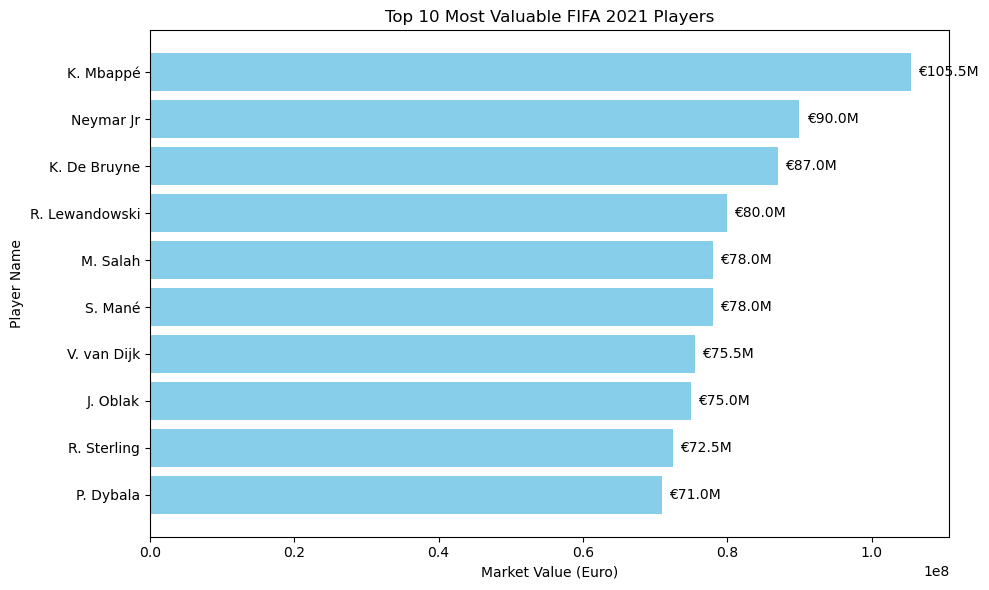

In [386]:
# Select relevant columns
players = df[["name", "value_eur"]]

# Sort by value in descending order (highest to lowest)
players = players.sort_values(by="value_eur", ascending=False)

# Extract top 10 players
top_10_players = players.head(10)

# Extract data for plotting
player_names = top_10_players["name"].to_list()  # Convert to list for plotting
player_values = top_10_players["value_eur"].to_list()

# Create a bar chart with clear figure size
plt.figure(figsize=(10, 6))

# Create horizontal bar plot with custom color
bars = plt.barh(player_names, player_values, color="skyblue")

for bar in bars:
    # Convert value to millions and format as a string with 'M' for millions
    value_in_million = bar.get_width() / 1_000_000  # Convert to millions
    plt.text(
        bar.get_width() + 1_000_000,  # Position to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Position at the center of the bar
        f'€{value_in_million:.1f}M',  # Text value in millions with 1 decimal place
        va='center',  # Align text vertically to center
        fontsize=10,  # Font size of the text
        color='black'  # Text color
    )

# Add informative labels and title with proper capitalization
plt.xlabel("Market Value (Euro)")
plt.ylabel("Player Name")
plt.title("Top 10 Most Valuable FIFA 2021 Players")

# Invert y-axis for readability and adjust layout
plt.gca().invert_yaxis()
plt.tight_layout()

# Display the plot
plt.show()


#### Top 10 Most Valuable FIFA 2021 Players

Kylian Mbappé, with a market value of €105.5 million, topped the list of the most valuable players in FIFA 2021. His exceptional talent and young age made him a standout among global football stars.


### **Top 10 countries with the most players in FIFA 2021**

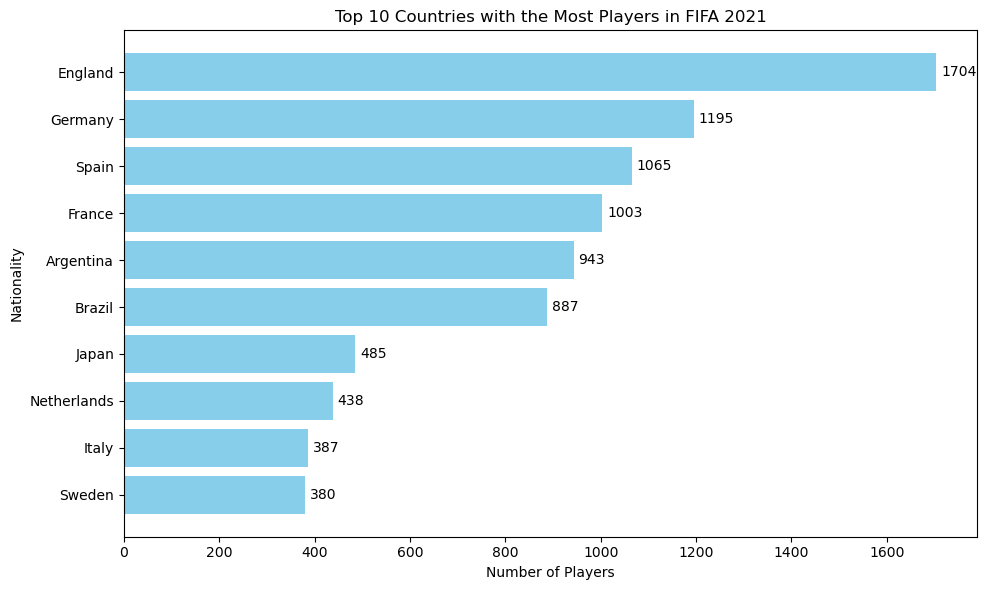

In [411]:
import matplotlib.pyplot as plt

# Take the top 10 countries with the most players
player_country = df["nationality"].value_counts()
player_country = player_country.sort_values(ascending=False).head(10)

# Create the bar chart with clear figure size
plt.figure(figsize=(10, 6))

# Create bar chart with custom color
bars = plt.barh(player_country.index, player_country.values, color="skyblue")

# Add values next to each bar
for bar in bars:
    plt.text(
        bar.get_width() + 10,  # Position to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Position at the center of the bar
        f'{int(bar.get_width())}',  # Text value
        va='center',  # Align text vertically to center
        fontsize=10,  # Font size of the text
        color='black'  # Text color
    )

# Add informative labels and title with proper capitalization
plt.xlabel("Number of Players")
plt.ylabel("Nationality")
plt.title("Top 10 Countries with the Most Players in FIFA 2021")

# Invert y-axis for readability and adjust layout
plt.gca().invert_yaxis()  # Invert y-axis to display highest value at the top
plt.tight_layout()


# Display the plot
plt.show()


### Key Insights:
- **England** leads the list, showcasing its strong footballing infrastructure and numerous professional leagues.
- **Germany, Spain, and France** continue to demonstrate their dominance in player production, with highly competitive domestic systems and successful national teams.
- **Argentina and Brazil** highlight their reputation as footballing powerhouses in South America.
- **Japan's** presence underscores the growing prominence of Asian football.
- **Netherlands, Italy, and Sweden** round out the list, further reflecting Europe’s significant contribution to global football talent.

These findings emphasize the widespread geographic distribution of football talent and the rich diversity within the sport.

# Top 10 Countries with the Most Players in FIFA 2021

The top 10 countries with the highest number of players in FIFA 2021 highlight the global nature of football. These countries contributed significantly to the pool of professional players, showcasing their strong football culture and talent development systems.

- **England** had the largest representation, emphasizing its deep-rooted football history and competitive leagues.
- **Germany**, **Spain**, and **France** followed closely, reflecting the strength of their domestic leagues and national teams.
- Other nations in the top 10 include **Italy**, **Argentina**, **Brazil**, **Netherlands**, **Portugal**, and **Turkey**, each bringing a rich legacy of footballing excellence.

This data illustrates the geographic diversity of football talent in FIFA 2021 and the global passion for the sport.


### **Distribution of player ages in FIFA 2021**

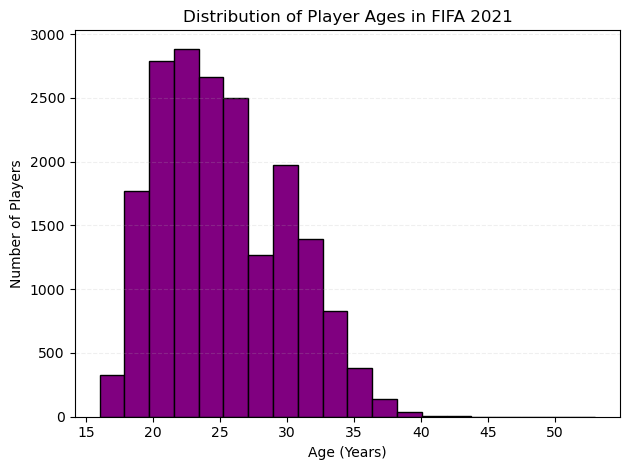

In [554]:
# Create the histogram with informative labels and title
plt.hist(df["age"], bins=20, color="purple", edgecolor="black")  # Add edgecolor for better visibility
plt.xlabel("Age (Years)")  # Specify units for clarity
plt.ylabel("Number of Players")
plt.title("Distribution of Player Ages in FIFA 2021")

# Improve readability with gridlines and tight layout
plt.grid(axis="y", linestyle="--", alpha=0.2)  # Add vertical gridlines with adjusted transparency
plt.tight_layout()

# Display the plot
plt.show()

**The histogram** provides a visualization of the age distribution of players in FIFA 2021. It shows that the majority of players are in their late 20s, with a smaller number of players in their early 20s and late 30s.

### **Age vs market value of FIFA 2021 players**

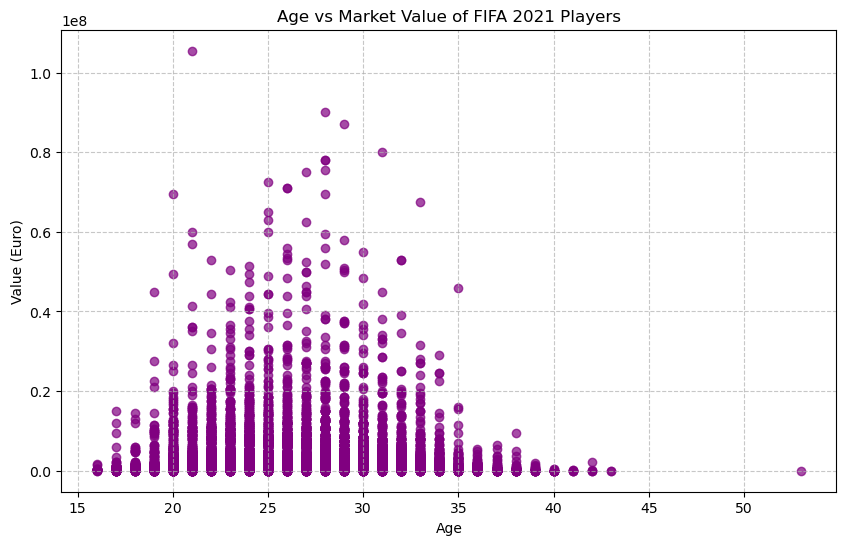

In [556]:
# Create a scatter plot for Value vs Age
plt.figure(figsize=(10, 6))
plt.scatter(df["age"], df["value_eur"], color="purple", alpha=0.7)  # Adjust alpha for transparency

# Add informative labels and title with proper capitalization
plt.xlabel("Age")
plt.ylabel("Value (Euro)")
plt.title("Age vs Market Value of FIFA 2021 Players")

# Improve readability with gridlines
plt.grid(True, linestyle="--", alpha=0.7)  # Adjust gridline transparency

# Display the plot
plt.show()


### Age vs Market Value of FIFA 2021 Players

This analysis explores the relationship between players' **age** and their **market value** in FIFA 2021. A scatter plot was created to visualize how a player's age correlates with their market value in euros.

#### Key Insights:
- **Peak Age Range:** Players between the ages of 24-28 tend to have the highest market values. This age group is typically in its prime, with peak physical condition and experience.
- **Declining Value with Age:** Players older than 30 generally have a lower market value, likely due to factors such as reduced performance, injuries, and shorter remaining career span.
- **Younger Players:** Younger players (18-23) often have high potential and, therefore, can have significant market value, although not always as high as players in their prime.

The scatter plot visually confirms these trends, offering valuable insights into how player market value shifts with age.


## **Height vs Weight**

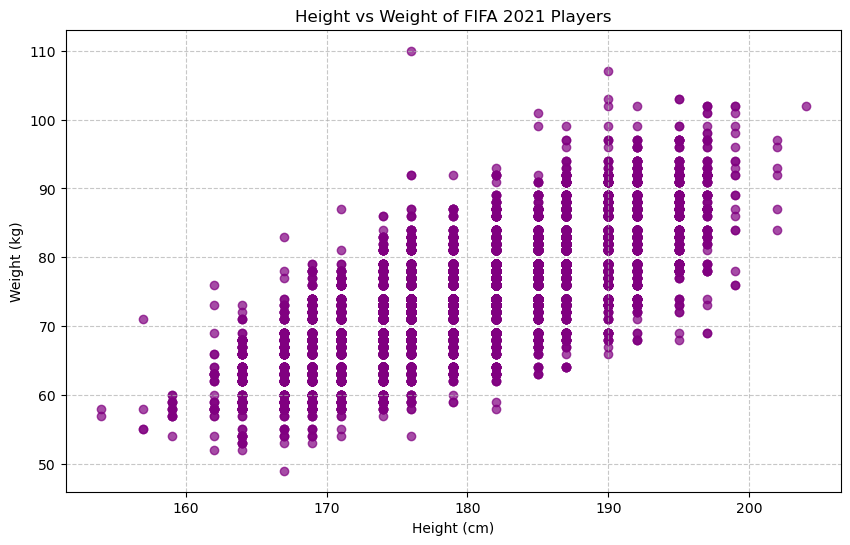

In [436]:
# Create a scatter plot for Height vs Weight
plt.figure(figsize=(10, 6))
plt.scatter(df["height_cm"], df["weight_kg"], color="purple", alpha=0.7)  # Adjust alpha for transparency

# Add informative labels and title with proper capitalization
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Height vs Weight of FIFA 2021 Players")

# Improve readability with gridlines
plt.grid(True, linestyle="--", alpha=0.7)  # Adjust gridline transparency

# Display the plot
plt.show()


### Key Insights:

There is a positive correlation between height and weight, with taller players generally weighing more.
Outliers exist, with one player weighing 110 kg and another 48 kg, suggesting variation in body types.

## **Height Categories of FIFA 2021 Players**

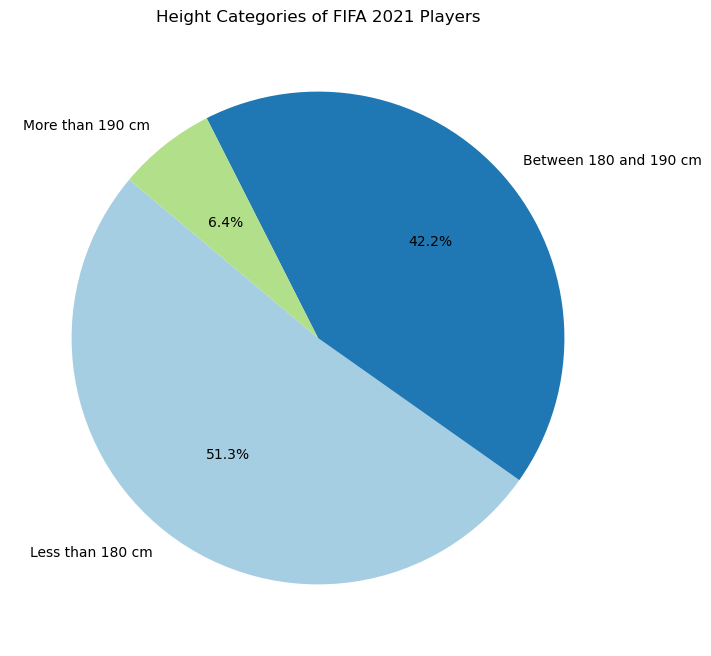

In [452]:
import matplotlib.pyplot as plt

# Categorize players based on their height
def categorize_height(height):
    if height < 180:
        return "Less than 180 cm"
    elif 180 <= height <= 190:
        return "Between 180 and 190 cm"
    else:
        return "More than 190 cm"

# Apply the categorization to the height column
df["height_category"] = df["height_cm"].apply(categorize_height)

# Get the counts of players in each category
height_category_counts = df["height_category"].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(height_category_counts, labels=height_category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Add a title
plt.title("Height Categories of FIFA 2021 Players")

# Show the pie chart
plt.show()


### **Key Insights:**

The majority of FIFA 2021 players (51.3%) fall under 180 cm in height.  
A significant portion (42.2%) are between 180 and 190 cm.  
Only a small number (6.4%) exceed 190 cm.

## Top 5 Tallest Players

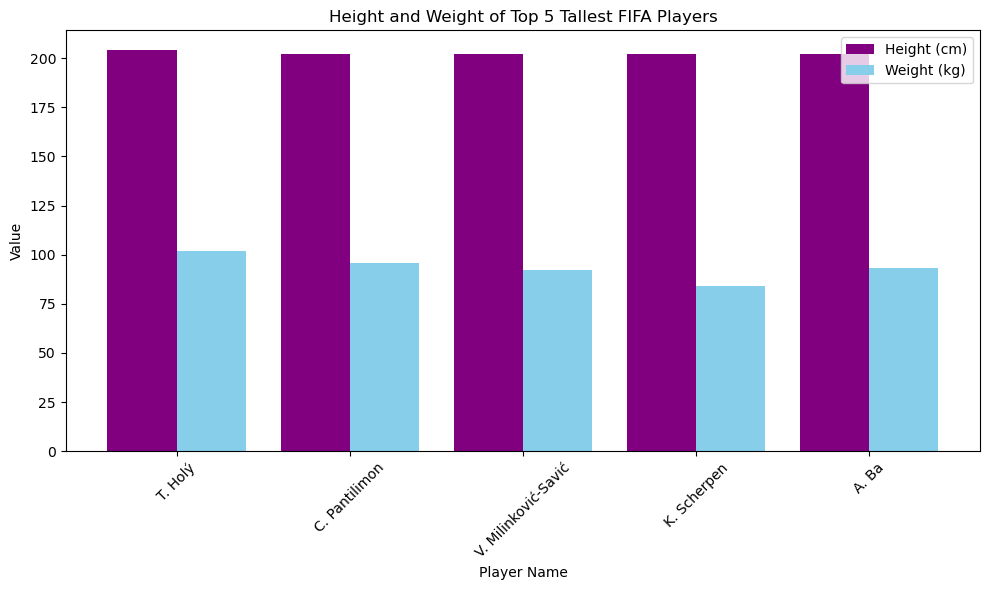

In [468]:
# Step 1: Find the Top 5 Tallest Players
top_5_tallest = df.nlargest(5, "height_cm")[["name", "height_cm", "weight_kg"]]

# Step 2: Extract Names, Heights, and Weights
player_names = top_5_tallest["name"]
player_heights = top_5_tallest["height_cm"]
player_weights = top_5_tallest["weight_kg"]

# Step 3: Create the Grouped Bar Chart
import numpy as np

x = np.arange(len(player_names))  # Label locations
width = 0.4  # Bar width

plt.figure(figsize=(10, 6))

# Plot height bars
plt.bar(x - width/2, player_heights, width, label="Height (cm)", color="purple")

# Plot weight bars
plt.bar(x + width/2, player_weights, width, label="Weight (kg)", color="skyblue")

# Step 4: Add Labels, Title, and Legends
plt.xlabel("Player Name")
plt.ylabel("Value")
plt.title("Height and Weight of Top 5 Tallest FIFA Players")
plt.xticks(x, player_names, rotation=45)  # Set player names as x-ticks
plt.legend()

# Step 5: Show the Chart
plt.tight_layout()
plt.show()


In [464]:
df.head()

,id,name,long_name,age,nationality,height_cm,weight_kg,team,contract_start,contract_end,...,d/w,international_reputation,pac,sho,pas,dri,def,phy,hits,height_category
0,158023,L. Messi,Lionel Messi,33,Argentina,169,72,FC Barcelona,2004,2021,...,Low,5,85,92,91,95,38,65,372,Less than 180 cm
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,35,Portugal,187,83,Juventus,2018,2022,...,Low,5,89,93,81,89,35,77,344,Between 180 and 190 cm
2,200389,J. Oblak,Jan Oblak,27,Slovenia,187,87,Atlético Madrid,2014,2023,...,Medium,3,87,92,78,90,52,90,86,Between 180 and 190 cm
3,192985,K. De Bruyne,Kevin De Bruyne,29,Belgium,179,69,Manchester City,2015,2023,...,High,4,76,86,93,88,64,78,163,Less than 180 cm
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,28,Brazil,174,68,Paris Saint-Germain,2017,2022,...,Medium,5,91,85,86,94,36,59,273,Less than 180 cm
